NYC COVID CRIME WAVE?  - November 2022

DATA AND LIBRARY IMPORT

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math as m

In [2]:
from matplotlib import pyplot as plt # import when data analysis begins
import seaborn as sns
import scipy.stats as ss
import plotly.express as px

In [3]:
import os #--pd. not working well, work from the os/terminal in computer
import pandas as pd

In [4]:
os.chdir("/Users/charlenenthomas/OneDrive/Documents")
crimedata2022= pd.read_csv("NYPD_Complaint_Data_Current__Year_To_Date_2022.csv")

In [5]:
import pandasql as psql # allows me to use SQL if i'm having trouble with python
from pandasql import sqldf

In [6]:
crimedata2022.head(8) # checking the data - did it come in ok?

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,247853895,43.0,BRONX,07/11/2022,09:09:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1022682.0,242998.0,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567)
1,250722124,67.0,BROOKLYN,01/01/2021,12:00:00,09/07/2022,12:00:00,COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,997843.0,175671.0,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884)
2,239511545,120.0,STATEN ISLAND,12/24/2021,08:00:00,01/03/2022,08:00:00,COMPLETED,(null),NaN,...,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,960911.0,165085.0,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768)
3,247992275,115.0,QUEENS,06/15/2015,00:01:00,07/13/2022,17:00:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,M,1013677.0,212463.0,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791)
4,239602232,75.0,BROOKLYN,01/01/2018,09:00:00,04/14/2021,23:59:00,COMPLETED,(null),NaN,...,NaN,65+,BLACK,M,1022153.0,184000.0,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636)
5,241344242,114.0,QUEENS,10/01/1997,13:00:00,06/01/2006,08:00:00,COMPLETED,(null),NaN,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,1007788.0,219633.0,40.769495,-73.915024,"(40.7694951184418, -73.9150241703895)",POINT (-73.9150241703895 40.7694951184418)
6,238607919,63.0,BROOKLYN,01/01/2022,04:00:00,01/01/2022,04:30:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1004210.0,170473.0,40.634565,-73.928086,"(40.634565, -73.928086)",POINT (-73.928086 40.634565)
7,240305135,33.0,MANHATTAN,11/04/2021,12:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE HISPANIC,F,1001602.0,246487.0,40.843208,-73.937286,"(40.843208, -73.937286)",POINT (-73.937286 40.843208)


In [7]:
crimedata2022.tail(8) # check the bottom: why are the column titles.....in the last row??

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
396970,251822915,101.0,QUEENS,09/30/2022,08:40:00,09/30/2022,08:50:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1049546.0,157349.0,40.598323,-73.764870,"(40.598323, -73.76487)",POINT (-73.76487 40.598323)
396971,251852087,105.0,QUEENS,09/29/2022,19:00:00,09/29/2022,19:15:00,COMPLETED,(null),NaN,...,NaN,25-44,BLACK,M,1054763.0,193040.0,40.696248,-73.745710,"(40.696248, -73.74571)",POINT (-73.74571 40.696248)
396972,251841822,25.0,MANHATTAN,09/30/2022,14:10:00,09/30/2022,14:16:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1001305.0,230071.0,40.798152,-73.938401,"(40.798152, -73.938401)",POINT (-73.938401 40.798152)
396973,251818673,46.0,BRONX,09/29/2022,08:30:00,09/29/2022,08:45:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,F,1011329.0,249447.0,40.851308,-73.902116,"(40.851308, -73.902116)",POINT (-73.902116 40.851308)
396974,251891178,94.0,BROOKLYN,09/30/2022,22:55:00,09/30/2022,23:02:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,999651.0,199731.0,40.714880,-73.944444,"(40.71488, -73.944444)",POINT (-73.944444 40.71488)
396975,251788586,79.0,BROOKLYN,09/29/2022,16:15:00,09/29/2022,16:18:00,COMPLETED,(null),510.0,...,NaN,UNKNOWN,UNKNOWN,E,1000180.0,193720.0,40.698381,-73.942550,"(40.698381, -73.94255)",POINT (-73.94255 40.698381)
396976,251833912,70.0,BROOKLYN,09/30/2022,12:00:00,09/30/2022,12:05:00,COMPLETED,(null),NaN,...,NaN,65+,BLACK,F,998374.0,171494.0,40.637378,-73.949109,"(40.637378, -73.949109)",POINT (-73.949109 40.637378)
396977,251833930,107.0,QUEENS,09/30/2022,08:30:00,09/30/2022,08:31:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1032738.0,207968.0,40.737370,-73.825029,"(40.73737, -73.825029)",POINT (-73.825029 40.73737)


DATA CLEANING

In [8]:
crimedata2022.info() #record/null check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396978 entries, 0 to 396977
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                396978 non-null  object 
 1   ADDR_PCT_CD               396958 non-null  float64
 2   BORO_NM                   396978 non-null  object 
 3   CMPLNT_FR_DT              396978 non-null  object 
 4   CMPLNT_FR_TM              396978 non-null  object 
 5   CMPLNT_TO_DT              367585 non-null  object 
 6   CMPLNT_TO_TM              396978 non-null  object 
 7   CRM_ATPT_CPTD_CD          396978 non-null  object 
 8   HADEVELOPT                396978 non-null  object 
 9   HOUSING_PSA               25466 non-null   float64
 10  JURISDICTION_CODE         396978 non-null  int64  
 11  JURIS_DESC                396978 non-null  object 
 12  KY_CD                     396978 non-null  int64  
 13  LAW_CAT_CD                396978 non-null  o

In [9]:
len(crimedata2022) #how many rows there are

396978

In [10]:
crimedata2022.columns #columns/fieldname check

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [11]:
# unique values of the key columns
crimedata2022['LAW_CAT_CD'].unique() 
crimedata2022['BORO_NM'].unique() 
crimedata2022['PD_DESC'].unique() 
crimedata2022['PREM_TYP_DESC'].unique() # change in what types of places were affected?
crimedata2022['SUSP_AGE_GROUP'].unique() 
crimedata2022['SUSP_RACE'].unique() 
crimedata2022['SUSP_SEX'].unique() 
crimedata2022['VIC_AGE_GROUP'].unique() 
crimedata2022['VIC_RACE'].unique() 
crimedata2022['VIC_SEX'].unique() 

array(['D', 'F', 'M', 'E', 'L'], dtype=object)

In [12]:
#Dropping columns - column drop stage 1
crimedata3 = crimedata2022.drop(['HADEVELOPT','HOUSING_PSA','JURISDICTION_CODE','JURIS_DESC','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','LOC_OF_OCCUR_DESC','PARKS_NM','PATROL_BORO','TRANSIT_DISTRICT','X_COORD_CD','Y_COORD_CD','STATION_NAME','CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM','KY_CD'],axis=1)

In [13]:
crimedata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396978 entries, 0 to 396977
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                396978 non-null  object 
 1   ADDR_PCT_CD               396958 non-null  float64
 2   BORO_NM                   396978 non-null  object 
 3   CMPLNT_FR_DT              396978 non-null  object 
 4   CRM_ATPT_CPTD_CD          396978 non-null  object 
 5   LAW_CAT_CD                396978 non-null  object 
 6   OFNS_DESC                 396978 non-null  object 
 7   PD_CD                     396538 non-null  float64
 8   PD_DESC                   396978 non-null  object 
 9   PREM_TYP_DESC             396978 non-null  object 
 10  RPT_DT                    396978 non-null  object 
 11  VIC_AGE_GROUP             396978 non-null  object 
 12  VIC_RACE                  396978 non-null  object 
 13  VIC_SEX                   396978 non-null  o

In [14]:
crimedata3.head(25) #table check

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CRM_ATPT_CPTD_CD,LAW_CAT_CD,OFNS_DESC,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,247853895,43.0,BRONX,07/11/2022,COMPLETED,FELONY,ROBBERY,361.0,"ROBBERY,BANK",BANK,07/11/2022,UNKNOWN,UNKNOWN,D,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567)
1,250722124,67.0,BROOKLYN,01/01/2021,COMPLETED,FELONY,RAPE,155.0,RAPE 2,RESIDENCE - APT. HOUSE,09/07/2022,<18,BLACK,F,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884)
2,239511545,120.0,STATEN ISLAND,12/24/2021,COMPLETED,FELONY,GRAND LARCENY,424.0,"LARCENY,GRAND BY CREDIT CARD ACCT COMPROMISE-E...",RESIDENCE-HOUSE,01/21/2022,18-24,ASIAN / PACIFIC ISLANDER,M,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768)
3,247992275,115.0,QUEENS,06/15/2015,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,07/13/2022,45-64,WHITE,M,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791)
4,239602232,75.0,BROOKLYN,01/01/2018,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,01/24/2022,65+,BLACK,M,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636)
5,241344242,114.0,QUEENS,10/01/1997,COMPLETED,FELONY,SEX CRIMES,168.0,SODOMY 1,RESIDENCE - APT. HOUSE,02/27/2022,25-44,ASIAN / PACIFIC ISLANDER,F,40.769495,-73.915024,"(40.7694951184418, -73.9150241703895)",POINT (-73.9150241703895 40.7694951184418)
6,238607919,63.0,BROOKLYN,01/01/2022,COMPLETED,MISDEMEANOR,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",GAS STATION,01/01/2022,UNKNOWN,UNKNOWN,D,40.634565,-73.928086,"(40.634565, -73.928086)",POINT (-73.928086 40.634565)
7,240305135,33.0,MANHATTAN,11/04/2021,COMPLETED,MISDEMEANOR,PETIT LARCENY,347.0,PETIT LARCENY-CHECK FROM MAILB,RESIDENCE - APT. HOUSE,02/08/2022,45-64,WHITE HISPANIC,F,40.843208,-73.937286,"(40.843208, -73.937286)",POINT (-73.937286 40.843208)
8,241477401,77.0,BROOKLYN,11/16/2021,COMPLETED,VIOLATION,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,03/02/2022,45-64,BLACK,F,40.672873,-73.923688,"(40.672873, -73.923688)",POINT (-73.923688 40.672873)
9,241005459,5.0,MANHATTAN,12/13/2021,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,02/21/2022,65+,ASIAN / PACIFIC ISLANDER,M,40.711951,-73.994313,"(40.711951, -73.994313)",POINT (-73.994313 40.711951)


In [15]:
crimedata3.tail(25) #table check

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CRM_ATPT_CPTD_CD,LAW_CAT_CD,OFNS_DESC,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Lat_Lon,New Georeferenced Column
396953,251792827,47.0,BRONX,09/29/2022,COMPLETED,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,RESTAURANT/DINER,09/29/2022,25-44,ASIAN / PACIFIC ISLANDER,M,40.888639,-73.842503,"(40.888639, -73.842503)",POINT (-73.842503 40.888639)
396954,251822933,114.0,QUEENS,09/30/2022,COMPLETED,FELONY,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",RESIDENCE - APT. HOUSE,09/30/2022,45-64,BLACK,M,40.752003,-73.935872,"(40.752003, -73.935872)",POINT (-73.935872 40.752003)
396955,251852789,77.0,BROOKLYN,09/30/2022,COMPLETED,MISDEMEANOR,VEHICLE AND TRAFFIC LAWS,916.0,LEAVING SCENE-ACCIDENT-PERSONA,STREET,09/30/2022,25-44,WHITE,M,40.672754,-73.954318,"(40.67275363, -73.9543177)",POINT (-73.9543177 40.67275363)
396956,251827182,73.0,BROOKLYN,09/29/2022,COMPLETED,VIOLATION,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",PUBLIC SCHOOL,09/29/2022,<18,BLACK,F,40.680397,-73.909898,"(40.680397, -73.909898)",POINT (-73.909898 40.680397)
396957,251864722,102.0,QUEENS,09/30/2022,COMPLETED,MISDEMEANOR,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",CHAIN STORE,09/30/2022,UNKNOWN,UNKNOWN,D,40.687663,-73.834064,"(40.687663, -73.834064)",POINT (-73.834064 40.687663)
396958,251852803,104.0,QUEENS,09/30/2022,COMPLETED,MISDEMEANOR,PETIT LARCENY,313.0,"LARCENY,PETIT BY FALSE PROMISE",RESIDENCE-HOUSE,09/30/2022,25-44,WHITE,F,40.703406,-73.904704,"(40.703406, -73.904704)",POINT (-73.904704 40.703406)
396959,251871312,5.0,MANHATTAN,09/30/2022,COMPLETED,VIOLATION,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",STREET,09/30/2022,65+,ASIAN / PACIFIC ISLANDER,M,40.719009,-73.998386,"(40.719009, -73.998386)",POINT (-73.998386 40.719009)
396960,251896487,63.0,BROOKLYN,09/30/2022,COMPLETED,MISDEMEANOR,VEHICLE AND TRAFFIC LAWS,916.0,LEAVING SCENE-ACCIDENT-PERSONA,STREET,09/30/2022,25-44,WHITE HISPANIC,M,40.628170,-73.941359,"(40.6281697437036, -73.9413587834752)",POINT (-73.9413587834752 40.6281697437036)
396961,251912634,73.0,BROOKLYN,09/30/2022,COMPLETED,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",RESIDENCE - APT. HOUSE,09/30/2022,25-44,BLACK,M,40.678339,-73.911913,"(40.678339, -73.911913)",POINT (-73.911913 40.678339)
396962,251844822,71.0,BROOKLYN,09/30/2022,COMPLETED,MISDEMEANOR,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",RESIDENCE - APT. HOUSE,09/30/2022,65+,BLACK,M,40.669085,-73.945005,"(40.669085, -73.945005)",POINT (-73.945005 40.669085)


CONVERTING THE DATES - TRIAL AND ERROR

Step 1 -  remove any years that start with "1000"

Step 2 - Convert format to python friendly form

In [16]:
#Selecting 2018 to 2022 data only -- do i want a specific borough
#import datetime

# d = datetime.datetime.strptime(crimedata3['CMPLNT_FR_DT'], '%m-%d-%Y') # only for specific strings/not a series
#crimedata3['CMPLNT_FR_DT'] = datetime.date.strftime(crimedata3['CMPLNT_FR_DT'], "%Y-%m/%d"))

#set datatype to date 
#crimedata3['CMPLNT_FR_DT'] = pd.to_datetime(crimedata3['CMPLNT_FR_DT'],format='%m/%d/%Y')
#crimedate3.info()

# d = datetime.datetime.strptime("2013-1-25", '%Y-%m-%d')
# print datetime.date.strftime(d, "%m/%d/%y")

In [17]:
# lambda function for pandasql -  data clean all of the years before 2000 -- 'module' object is not callable 
#step 1 THAT WORKS!
mysql = lambda q: sqldf(q, globals())

query1  = ('''
SELECT *
FROM crimedata3
WHERE CMPLNT_FR_DT NOT LIKE '%%/%%/1%%%';
''')
df2 = mysql(query1)
df2.head(10)

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CRM_ATPT_CPTD_CD,LAW_CAT_CD,OFNS_DESC,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,247853895,43.0,BRONX,07/11/2022,COMPLETED,FELONY,ROBBERY,361.0,"ROBBERY,BANK",BANK,07/11/2022,UNKNOWN,UNKNOWN,D,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567)
1,250722124,67.0,BROOKLYN,01/01/2021,COMPLETED,FELONY,RAPE,155.0,RAPE 2,RESIDENCE - APT. HOUSE,09/07/2022,<18,BLACK,F,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884)
2,239511545,120.0,STATEN ISLAND,12/24/2021,COMPLETED,FELONY,GRAND LARCENY,424.0,"LARCENY,GRAND BY CREDIT CARD ACCT COMPROMISE-E...",RESIDENCE-HOUSE,01/21/2022,18-24,ASIAN / PACIFIC ISLANDER,M,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768)
3,247992275,115.0,QUEENS,06/15/2015,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,07/13/2022,45-64,WHITE,M,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791)
4,239602232,75.0,BROOKLYN,01/01/2018,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,01/24/2022,65+,BLACK,M,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636)
5,238607919,63.0,BROOKLYN,01/01/2022,COMPLETED,MISDEMEANOR,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",GAS STATION,01/01/2022,UNKNOWN,UNKNOWN,D,40.634565,-73.928086,"(40.634565, -73.928086)",POINT (-73.928086 40.634565)
6,240305135,33.0,MANHATTAN,11/04/2021,COMPLETED,MISDEMEANOR,PETIT LARCENY,347.0,PETIT LARCENY-CHECK FROM MAILB,RESIDENCE - APT. HOUSE,02/08/2022,45-64,WHITE HISPANIC,F,40.843208,-73.937286,"(40.843208, -73.937286)",POINT (-73.937286 40.843208)
7,241477401,77.0,BROOKLYN,11/16/2021,COMPLETED,VIOLATION,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,03/02/2022,45-64,BLACK,F,40.672873,-73.923688,"(40.672873, -73.923688)",POINT (-73.923688 40.672873)
8,241005459,5.0,MANHATTAN,12/13/2021,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,02/21/2022,65+,ASIAN / PACIFIC ISLANDER,M,40.711951,-73.994313,"(40.711951, -73.994313)",POINT (-73.994313 40.711951)
9,240031566,48.0,BRONX,11/12/2021,COMPLETED,FELONY,GRAND LARCENY,458.0,"LARCENY,GRAND FROM RESIDENCE/BUILDING,UNATTEND...",RESIDENCE - APT. HOUSE,01/31/2022,18-24,UNKNOWN,F,40.843532,-73.891258,"(40.843532, -73.891258)",POINT (-73.891258 40.843532)


In [18]:
df2['CMPLNT_FR_DT'] = pd.to_datetime(df2['CMPLNT_FR_DT'],format='%m/%d/%Y') #step 2 FINAL/ convert to datetime
df2.info() #confirm conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396899 entries, 0 to 396898
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   CMPLNT_NUM                396899 non-null  object        
 1   ADDR_PCT_CD               396879 non-null  float64       
 2   BORO_NM                   396899 non-null  object        
 3   CMPLNT_FR_DT              396899 non-null  datetime64[ns]
 4   CRM_ATPT_CPTD_CD          396899 non-null  object        
 5   LAW_CAT_CD                396899 non-null  object        
 6   OFNS_DESC                 396899 non-null  object        
 7   PD_CD                     396461 non-null  float64       
 8   PD_DESC                   396899 non-null  object        
 9   PREM_TYP_DESC             396899 non-null  object        
 10  RPT_DT                    396899 non-null  object        
 11  VIC_AGE_GROUP             396899 non-null  object        
 12  VI

In [19]:
df2.head(5) # table check! came into python fine

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CRM_ATPT_CPTD_CD,LAW_CAT_CD,OFNS_DESC,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,247853895,43.0,BRONX,2022-07-11,COMPLETED,FELONY,ROBBERY,361.0,"ROBBERY,BANK",BANK,07/11/2022,UNKNOWN,UNKNOWN,D,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567)
1,250722124,67.0,BROOKLYN,2021-01-01,COMPLETED,FELONY,RAPE,155.0,RAPE 2,RESIDENCE - APT. HOUSE,09/07/2022,<18,BLACK,F,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884)
2,239511545,120.0,STATEN ISLAND,2021-12-24,COMPLETED,FELONY,GRAND LARCENY,424.0,"LARCENY,GRAND BY CREDIT CARD ACCT COMPROMISE-E...",RESIDENCE-HOUSE,01/21/2022,18-24,ASIAN / PACIFIC ISLANDER,M,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768)
3,247992275,115.0,QUEENS,2015-06-15,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,07/13/2022,45-64,WHITE,M,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791)
4,239602232,75.0,BROOKLYN,2018-01-01,COMPLETED,FELONY,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,01/24/2022,65+,BLACK,M,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636)


HISTORIC YEARS DATA CLEANING - 2018-2021

In [20]:
#LOADING DATA

os.chdir("/Users/charlenenthomas/OneDrive/Documents")
crimedata2018= pd.read_csv("Crime_Data_2018.csv")

In [21]:
os.chdir("/Users/charlenenthomas/OneDrive/Documents")
crimedata2019= pd.read_csv("Crime_Data_2019.csv")

os.chdir("/Users/charlenenthomas/OneDrive/Documents")
crimedata2020= pd.read_csv("Crime_Data_2020.csv")

os.chdir("/Users/charlenenthomas/OneDrive/Documents")
crimedata2021= pd.read_csv("Crime_Data_2021.csv")

In [22]:
#DATA ENTRY CHECK
crimedata2018.head()

,CMPLNT_NUM,CMPLNT_FR_DT,ADDR_PCT_CD,RPT_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,32.0,03/30/2018,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,MANHATTAN,PARKING LOT/GARAGE (PUBLIC),40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,25-44,WHITE,F
1,629632833,02/06/2018,52.0,02/07/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,BRONX,DEPARTMENT STORE,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,75.0,11/21/2018,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BROOKLYN,STREET,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,10.0,06/10/2018,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19.0,11/10/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,MANHATTAN,CHAIN STORE,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,UNKNOWN,UNKNOWN,D


In [23]:
#CONVERT CMPLNT-FR_DT TO DATETIME FOR ALL TABLES

crimedata2018['CMPLNT_FR_DT'] = pd.to_datetime(crimedata2018['CMPLNT_FR_DT'],format='%m/%d/%Y') #step 2 FINAL
crimedata2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462239 entries, 0 to 462238
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CMPLNT_NUM     462239 non-null  int64         
 1   CMPLNT_FR_DT   462239 non-null  datetime64[ns]
 2   ADDR_PCT_CD    462236 non-null  float64       
 3   RPT_DT         462239 non-null  object        
 4   OFNS_DESC      462229 non-null  object        
 5   PD_DESC        461939 non-null  object        
 6   LAW_CAT_CD     462239 non-null  object        
 7   BORO_NM        461935 non-null  object        
 8   PREM_TYP_DESC  460285 non-null  object        
 9   Latitude       462200 non-null  float64       
 10  Longitude      462200 non-null  float64       
 11  Lat_Lon        462200 non-null  object        
 12  PATROL_BORO    461939 non-null  object        
 13  VIC_AGE_GROUP  462239 non-null  object        
 14  VIC_RACE       462239 non-null  object        
 15  

In [24]:
crimedata2019['CMPLNT_FR_DT'] = pd.to_datetime(crimedata2019['CMPLNT_FR_DT'],format='%m/%d/%Y') #step 2 FINAL: convert to datetime
crimedata2019.info() # confirm transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CMPLNT_NUM     458441 non-null  int64         
 1   CMPLNT_FR_DT   458441 non-null  datetime64[ns]
 2   ADDR_PCT_CD    458441 non-null  int64         
 3   RPT_DT         458441 non-null  object        
 4   OFNS_DESC      458433 non-null  object        
 5   PD_DESC        458140 non-null  object        
 6   LAW_CAT_CD     458441 non-null  object        
 7   BORO_NM        458133 non-null  object        
 8   PREM_TYP_DESC  456605 non-null  object        
 9   Latitude       458441 non-null  float64       
 10  Longitude      458441 non-null  float64       
 11  Lat_Lon        458441 non-null  object        
 12  PATROL_BORO    458140 non-null  object        
 13  VIC_AGE_GROUP  458438 non-null  object        
 14  VIC_RACE       458438 non-null  object        
 15  

In [25]:
crimedata2020['CMPLNT_FR_DT'] = pd.to_datetime(crimedata2020['CMPLNT_FR_DT'],format='%m/%d/%Y') #step 2 FINAL
crimedata2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412221 entries, 0 to 412220
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CMPLNT_NUM     412221 non-null  int64         
 1   CMPLNT_FR_DT   412221 non-null  datetime64[ns]
 2   ADDR_PCT_CD    412221 non-null  int64         
 3   RPT_DT         412221 non-null  object        
 4   OFNS_DESC      412215 non-null  object        
 5   PD_DESC        411773 non-null  object        
 6   LAW_CAT_CD     412221 non-null  object        
 7   BORO_NM        411746 non-null  object        
 8   PREM_TYP_DESC  411090 non-null  object        
 9   Latitude       412221 non-null  float64       
 10  Longitude      412221 non-null  float64       
 11  Lat_Lon        412221 non-null  object        
 12  PATROL_BORO    411773 non-null  object        
 13  VIC_AGE_GROUP  412220 non-null  object        
 14  VIC_RACE       412220 non-null  object        
 15  

In [26]:
crimedata2021['CMPLNT_FR_DT'] = pd.to_datetime(crimedata2021['CMPLNT_FR_DT'],format='%m/%d/%Y') #step 2 FINAL
crimedata2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439625 entries, 0 to 439624
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CMPLNT_NUM     439625 non-null  int64         
 1   CMPLNT_FR_DT   439625 non-null  datetime64[ns]
 2   ADDR_PCT_CD    439625 non-null  int64         
 3   RPT_DT         439625 non-null  object        
 4   OFNS_DESC      439617 non-null  object        
 5   PD_DESC        439165 non-null  object        
 6   LAW_CAT_CD     439625 non-null  object        
 7   BORO_NM        438502 non-null  object        
 8   PREM_TYP_DESC  438418 non-null  object        
 9   Latitude       439625 non-null  float64       
 10  Longitude      439625 non-null  float64       
 11  Lat_Lon        439625 non-null  object        
 12  PATROL_BORO    439165 non-null  object        
 13  VIC_AGE_GROUP  439625 non-null  object        
 14  VIC_RACE       439544 non-null  object        
 15  

In [27]:
df2.columns #review column headers to figure out what to drop

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'PREM_TYP_DESC', 'RPT_DT', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

In [28]:
crimedata2018.columns #review column headers to figure out what to drop

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'ADDR_PCT_CD', 'RPT_DT', 'OFNS_DESC',
       'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX'],
      dtype='object')

In [29]:
crimedataRECENT = df2.drop(['New Georeferenced Column','CRM_ATPT_CPTD_CD','PD_CD'],axis=1) #dropped columns

In [30]:
crimedataRECENT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396899 entries, 0 to 396898
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   CMPLNT_NUM     396899 non-null  object        
 1   ADDR_PCT_CD    396879 non-null  float64       
 2   BORO_NM        396899 non-null  object        
 3   CMPLNT_FR_DT   396899 non-null  datetime64[ns]
 4   LAW_CAT_CD     396899 non-null  object        
 5   OFNS_DESC      396899 non-null  object        
 6   PD_DESC        396899 non-null  object        
 7   PREM_TYP_DESC  396899 non-null  object        
 8   RPT_DT         396899 non-null  object        
 9   VIC_AGE_GROUP  396899 non-null  object        
 10  VIC_RACE       396899 non-null  object        
 11  VIC_SEX        396899 non-null  object        
 12  Latitude       396890 non-null  float64       
 13  Longitude      396890 non-null  float64       
 14  Lat_Lon        396890 non-null  object        
dtype

In [31]:
crimedataRECENT.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,LAW_CAT_CD,OFNS_DESC,PD_DESC,PREM_TYP_DESC,RPT_DT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,Lat_Lon
0,247853895,43.0,BRONX,2022-07-11,FELONY,ROBBERY,"ROBBERY,BANK",BANK,07/11/2022,UNKNOWN,UNKNOWN,D,40.833567,-73.861118,"(40.833567, -73.861118)"
1,250722124,67.0,BROOKLYN,2021-01-01,FELONY,RAPE,RAPE 2,RESIDENCE - APT. HOUSE,09/07/2022,<18,BLACK,F,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)"
2,239511545,120.0,STATEN ISLAND,2021-12-24,FELONY,GRAND LARCENY,"LARCENY,GRAND BY CREDIT CARD ACCT COMPROMISE-E...",RESIDENCE-HOUSE,01/21/2022,18-24,ASIAN / PACIFIC ISLANDER,M,40.619768,-74.084070,"(40.619768, -74.08407)"
3,247992275,115.0,QUEENS,2015-06-15,FELONY,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,07/13/2022,45-64,WHITE,M,40.749791,-73.893792,"(40.749791, -73.893792)"
4,239602232,75.0,BROOKLYN,2018-01-01,FELONY,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE - APT. HOUSE,01/24/2022,65+,BLACK,M,40.671636,-73.863359,"(40.671636, -73.863359)"


In [32]:
#unite 4 datatables that have were extracted from the OpenData using Sql
NYCcrime = [crimedata2018, crimedata2019, crimedata2020, crimedata2021]

Union20192021 = pd.concat(NYCcrime)

In [33]:
Union20192021.info() #record count from 2018-2021 :1,772,526 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772526 entries, 0 to 439624
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   CMPLNT_NUM     int64         
 1   CMPLNT_FR_DT   datetime64[ns]
 2   ADDR_PCT_CD    float64       
 3   RPT_DT         object        
 4   OFNS_DESC      object        
 5   PD_DESC        object        
 6   LAW_CAT_CD     object        
 7   BORO_NM        object        
 8   PREM_TYP_DESC  object        
 9   Latitude       float64       
 10  Longitude      float64       
 11  Lat_Lon        object        
 12  PATROL_BORO    object        
 13  VIC_AGE_GROUP  object        
 14  VIC_RACE       object        
 15  VIC_SEX        object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(11)
memory usage: 229.9+ MB


In [34]:
Union20192021 = Union20192021.drop(['PATROL_BORO'],axis=1) #more dropping

In [35]:
Union20192021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772526 entries, 0 to 439624
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   CMPLNT_NUM     int64         
 1   CMPLNT_FR_DT   datetime64[ns]
 2   ADDR_PCT_CD    float64       
 3   RPT_DT         object        
 4   OFNS_DESC      object        
 5   PD_DESC        object        
 6   LAW_CAT_CD     object        
 7   BORO_NM        object        
 8   PREM_TYP_DESC  object        
 9   Latitude       float64       
 10  Longitude      float64       
 11  Lat_Lon        object        
 12  VIC_AGE_GROUP  object        
 13  VIC_RACE       object        
 14  VIC_SEX        object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 216.4+ MB


In [36]:
#re-arrange the columns to unite the whole list

crime1 = crimedataRECENT[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'ADDR_PCT_CD', 'RPT_DT', 'OFNS_DESC',
       'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC', 'Latitude',
       'Longitude', 'Lat_Lon', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX']]  #new order

In [37]:
crime1.head() #confirm order

,CMPLNT_NUM,CMPLNT_FR_DT,ADDR_PCT_CD,RPT_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,247853895,2022-07-11,43.0,07/11/2022,ROBBERY,"ROBBERY,BANK",FELONY,BRONX,BANK,40.833567,-73.861118,"(40.833567, -73.861118)",UNKNOWN,UNKNOWN,D
1,250722124,2021-01-01,67.0,09/07/2022,RAPE,RAPE 2,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",<18,BLACK,F
2,239511545,2021-12-24,120.0,01/21/2022,GRAND LARCENY,"LARCENY,GRAND BY CREDIT CARD ACCT COMPROMISE-E...",FELONY,STATEN ISLAND,RESIDENCE-HOUSE,40.619768,-74.084070,"(40.619768, -74.08407)",18-24,ASIAN / PACIFIC ISLANDER,M
3,247992275,2015-06-15,115.0,07/13/2022,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",FELONY,QUEENS,RESIDENCE - APT. HOUSE,40.749791,-73.893792,"(40.749791, -73.893792)",45-64,WHITE,M
4,239602232,2018-01-01,75.0,01/24/2022,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,40.671636,-73.863359,"(40.671636, -73.863359)",65+,BLACK,M


In [38]:
Union20192021.head() #confirm order

,CMPLNT_NUM,CMPLNT_FR_DT,ADDR_PCT_CD,RPT_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,2018-03-29,32.0,03/30/2018,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,MANHATTAN,PARKING LOT/GARAGE (PUBLIC),40.810877,-73.941064,"(40.810877241, -73.941064151)",25-44,WHITE,F
1,629632833,2018-02-06,52.0,02/07/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,BRONX,DEPARTMENT STORE,40.873671,-73.908014,"(40.873671035, -73.908013649)",UNKNOWN,UNKNOWN,D
2,787203902,2018-11-21,75.0,11/21/2018,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BROOKLYN,STREET,40.651782,-73.885457,"(40.651782232, -73.885456761)",UNKNOWN,UNKNOWN,D
3,280364018,2018-06-09,10.0,06/10/2018,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,40.759310,-73.994706,"(40.759310399, -73.994706072)",18-24,WHITE HISPANIC,F
4,985800320,2018-11-10,19.0,11/10/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,MANHATTAN,CHAIN STORE,40.764536,-73.970728,"(40.764535539, -73.970728388)",UNKNOWN,UNKNOWN,D


In [39]:
#unite the whole dataset!!!
NYCcrime2 = [Union20192021,crime1]

Union20192022 = pd.concat(NYCcrime2)

In [40]:
Union20192022.info() #check and confirm; record count = 2,169,425

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169425 entries, 0 to 396898
Data columns (total 15 columns):
 #   Column         Dtype         
---  ------         -----         
 0   CMPLNT_NUM     object        
 1   CMPLNT_FR_DT   datetime64[ns]
 2   ADDR_PCT_CD    float64       
 3   RPT_DT         object        
 4   OFNS_DESC      object        
 5   PD_DESC        object        
 6   LAW_CAT_CD     object        
 7   BORO_NM        object        
 8   PREM_TYP_DESC  object        
 9   Latitude       float64       
 10  Longitude      float64       
 11  Lat_Lon        object        
 12  VIC_AGE_GROUP  object        
 13  VIC_RACE       object        
 14  VIC_SEX        object        
dtypes: datetime64[ns](1), float64(3), object(11)
memory usage: 264.8+ MB


In [41]:
#Rename Columns
Union20192022 = Union20192022.rename(columns = {"CMPLNT_NUM": "Record ID Number","CMPLNT_FR_DT":"Date of Crime", "BORO_NM" : "Borough", "LAW_CAT_CD" : "Level of Offense", "VIC_RACE":"Race of Victim", "VIC_AGE_GROUP":"Age of Victim", "VIC_SEX":"SexGender of Victim", "PREM_TYP_DESC": "Location of Crime", "ADDR_PCT_CD":"Precinct of Crime","RPT_DT":"First Recorded"})

In [42]:
Union20192022 = Union20192022.rename(columns = { "OFNS_DESC":"Description of Offense", "PD_DESC":"Description of Offense(G)"})

In [43]:
Union20192022.info()  #column check/confirm

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169425 entries, 0 to 396898
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Record ID Number           object        
 1   Date of Crime              datetime64[ns]
 2   Precinct of Crime          float64       
 3   First Recorded             object        
 4   Description of Offense     object        
 5   Description of Offense(G)  object        
 6   Level of Offense           object        
 7   Borough                    object        
 8   Location of Crime          object        
 9   Latitude                   float64       
 10  Longitude                  float64       
 11  Lat_Lon                    object        
 12  Age of Victim              object        
 13  Race of Victim             object        
 14  SexGender of Victim        object        
dtypes: datetime64[ns](1), float64(3), object(11)
memory usage: 264.8+ MB


In [44]:
Union20192022.head(15)

,Record ID Number,Date of Crime,Precinct of Crime,First Recorded,Description of Offense,Description of Offense(G),Level of Offense,Borough,Location of Crime,Latitude,Longitude,Lat_Lon,Age of Victim,Race of Victim,SexGender of Victim
0,506547392,2018-03-29,32.0,03/30/2018,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,MANHATTAN,PARKING LOT/GARAGE (PUBLIC),40.810877,-73.941064,"(40.810877241, -73.941064151)",25-44,WHITE,F
1,629632833,2018-02-06,52.0,02/07/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,BRONX,DEPARTMENT STORE,40.873671,-73.908014,"(40.873671035, -73.908013649)",UNKNOWN,UNKNOWN,D
2,787203902,2018-11-21,75.0,11/21/2018,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BROOKLYN,STREET,40.651782,-73.885457,"(40.651782232, -73.885456761)",UNKNOWN,UNKNOWN,D
3,280364018,2018-06-09,10.0,06/10/2018,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,40.759310,-73.994706,"(40.759310399, -73.994706072)",18-24,WHITE HISPANIC,F
4,985800320,2018-11-10,19.0,11/10/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,MANHATTAN,CHAIN STORE,40.764536,-73.970728,"(40.764535539, -73.970728388)",UNKNOWN,UNKNOWN,D
5,777641183,2018-03-12,25.0,03/12/2018,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,TRANSIT - NYC SUBWAY,40.804384,-73.937422,"(40.804384046, -73.937421669)",UNKNOWN,UNKNOWN,E
6,683416529,2018-09-12,46.0,09/12/2018,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",FELONY,BRONX,FAST FOOD,40.853653,-73.906892,"(40.853653041, -73.906891831)",UNKNOWN,UNKNOWN,D
7,570490441,2018-01-16,69.0,01/16/2018,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BROOKLYN,STREET,40.635516,-73.913278,"(40.635516265, -73.913277993)",<18,BLACK,M
8,377132404,2018-08-04,44.0,08/04/2018,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BRONX,RESIDENCE - APT. HOUSE,40.826170,-73.916831,"(40.826169612, -73.916830709)",25-44,WHITE HISPANIC,F
9,504303130,2018-09-26,28.0,09/26/2018,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY,MANHATTAN,STREET,40.803905,-73.952037,"(40.803905237, -73.952036608)",25-44,BLACK,M


DATA EXPLORATION!!!! Fireworks!!! Confetti!!! Wooooo!!!!

In [45]:
Union20192022.isnull().sum()

Record ID Number                0
Date of Crime                   0
Precinct of Crime              23
First Recorded                  0
Description of Offense         32
Description of Offense(G)    1509
Level of Offense                0
Borough                      2210
Location of Crime            6128
Latitude                       48
Longitude                      48
Lat_Lon                        48
Age of Victim                   4
Race of Victim                 85
SexGender of Victim             4
dtype: int64

In [46]:
Union20192022 = Union20192022.dropna(axis=0,how="any")

In [47]:
Union20192022.isnull().sum() #check

Record ID Number             0
Date of Crime                0
Precinct of Crime            0
First Recorded               0
Description of Offense       0
Description of Offense(G)    0
Level of Offense             0
Borough                      0
Location of Crime            0
Latitude                     0
Longitude                    0
Lat_Lon                      0
Age of Victim                0
Race of Victim               0
SexGender of Victim          0
dtype: int64

In [48]:
len(Union20192022) #record count from 2018 - 2022: 2,162,457

2162457

In [49]:
Union20192022.info() #confirm/check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162457 entries, 0 to 396898
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Record ID Number           object        
 1   Date of Crime              datetime64[ns]
 2   Precinct of Crime          float64       
 3   First Recorded             object        
 4   Description of Offense     object        
 5   Description of Offense(G)  object        
 6   Level of Offense           object        
 7   Borough                    object        
 8   Location of Crime          object        
 9   Latitude                   float64       
 10  Longitude                  float64       
 11  Lat_Lon                    object        
 12  Age of Victim              object        
 13  Race of Victim             object        
 14  SexGender of Victim        object        
dtypes: datetime64[ns](1), float64(3), object(11)
memory usage: 264.0+ MB


In [64]:
Union20192022.duplicated().sum() #count the number of duplicate values 

49

In [65]:
Union20192022 = Union20192022.drop_duplicates() #drop duplicate values 

In [66]:
Union20192022.info() #confirm/check; final record count: 2,162,408

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162408 entries, 0 to 396898
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Record ID Number           object        
 1   Date of Crime              datetime64[ns]
 2   Precinct of Crime          float64       
 3   First Recorded             object        
 4   Description of Offense     object        
 5   Description of Offense(G)  object        
 6   Level of Offense           object        
 7   Borough                    object        
 8   Location of Crime          object        
 9   Latitude                   float64       
 10  Longitude                  float64       
 11  Lat_Lon                    object        
 12  Age of Victim              object        
 13  Race of Victim             object        
 14  SexGender of Victim        object        
dtypes: datetime64[ns](1), float64(3), object(11)
memory usage: 264.0+ MB


In [67]:
Union20192022.describe() #not helpful

,Precinct of Crime,Latitude,Longitude
count,2.162408e+06,2.162408e+06,2.162408e+06
mean,6.318687e+01,4.073674e+01,-7.392416e+01
std,3.480436e+01,8.265886e-02,7.671266e-02
min,1.000000e+00,4.049891e+01,-7.425474e+01
25%,4.000000e+01,4.067494e+01,-7.397243e+01
50%,6.300000e+01,4.073464e+01,-7.392680e+01
75%,1.000000e+02,4.081199e+01,-7.388151e+01
max,1.230000e+02,4.091272e+01,-7.370029e+01


In [ ]:
#Currs

In [68]:
sns.set(rc={'figure.figsize': (25,10)}) # set the figure sizes

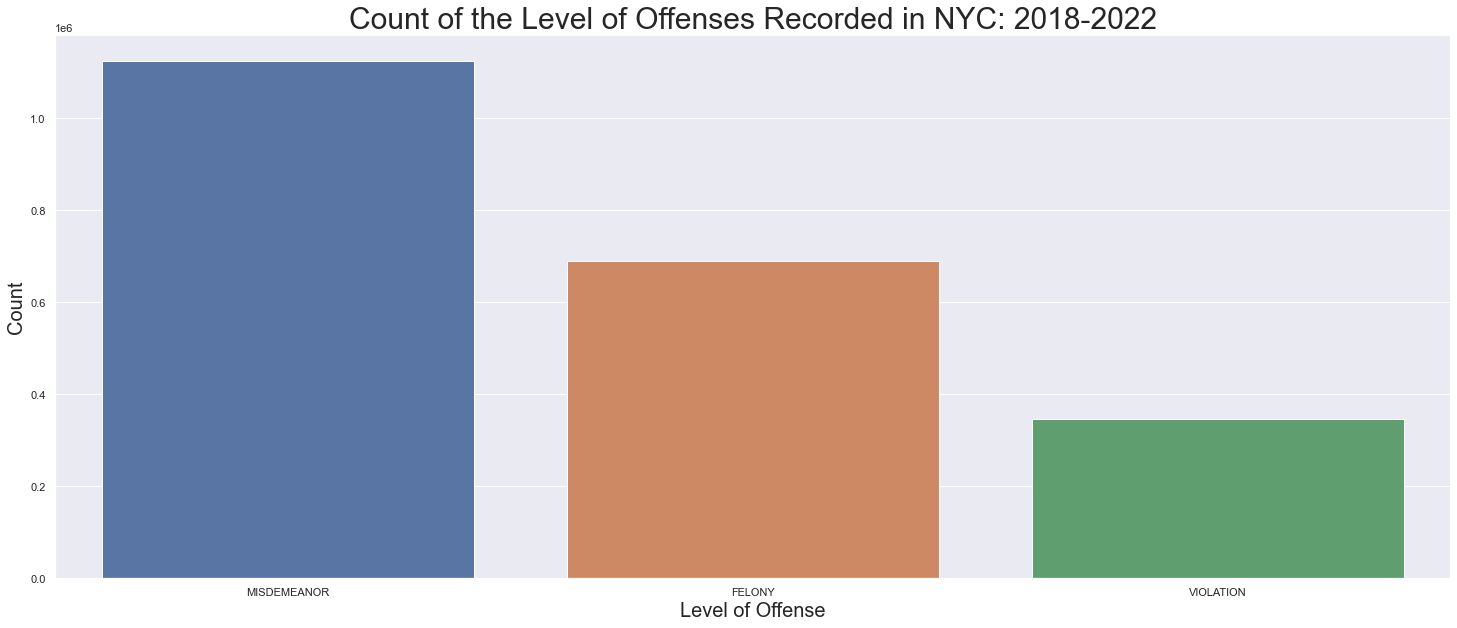

In [69]:
#count of Level of Offense

plot_1 = sns.countplot(data = Union20192022, x = 'Level of Offense')
plt.xlabel('Level of Offense',fontdict={'fontsize': 20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.title('Count of the Level of Offenses Recorded in NYC: 2018-2022',fontdict={'fontsize': 30})
# #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 200)
# plt.grid(True)
plt.show()

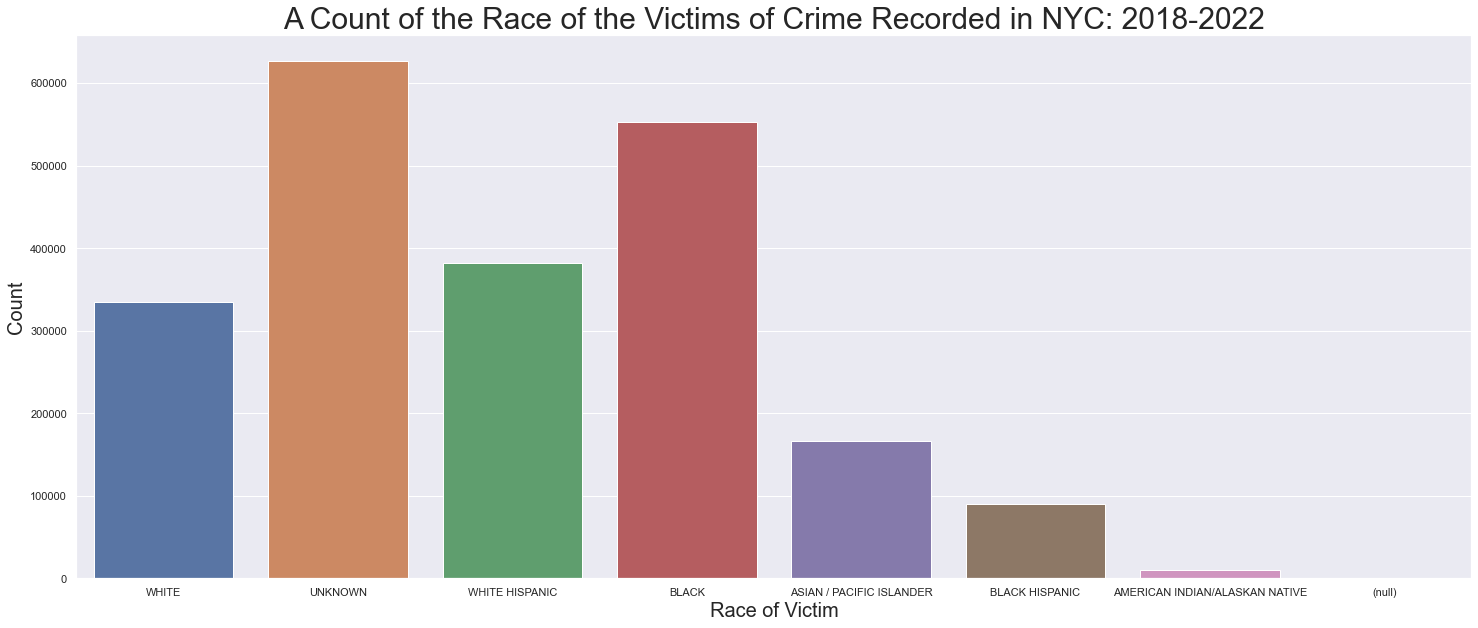

In [70]:
#count of Race of Victim

plot_2 = sns.countplot(data = Union20192022, x = 'Race of Victim')
plt.xlabel('Race of Victim',fontdict={'fontsize': 20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.title('A Count of the Race of the Victims of Crime Recorded in NYC: 2018-2022',fontdict={'fontsize': 30})
# #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 200)
# plt.grid(True)
plt.show()

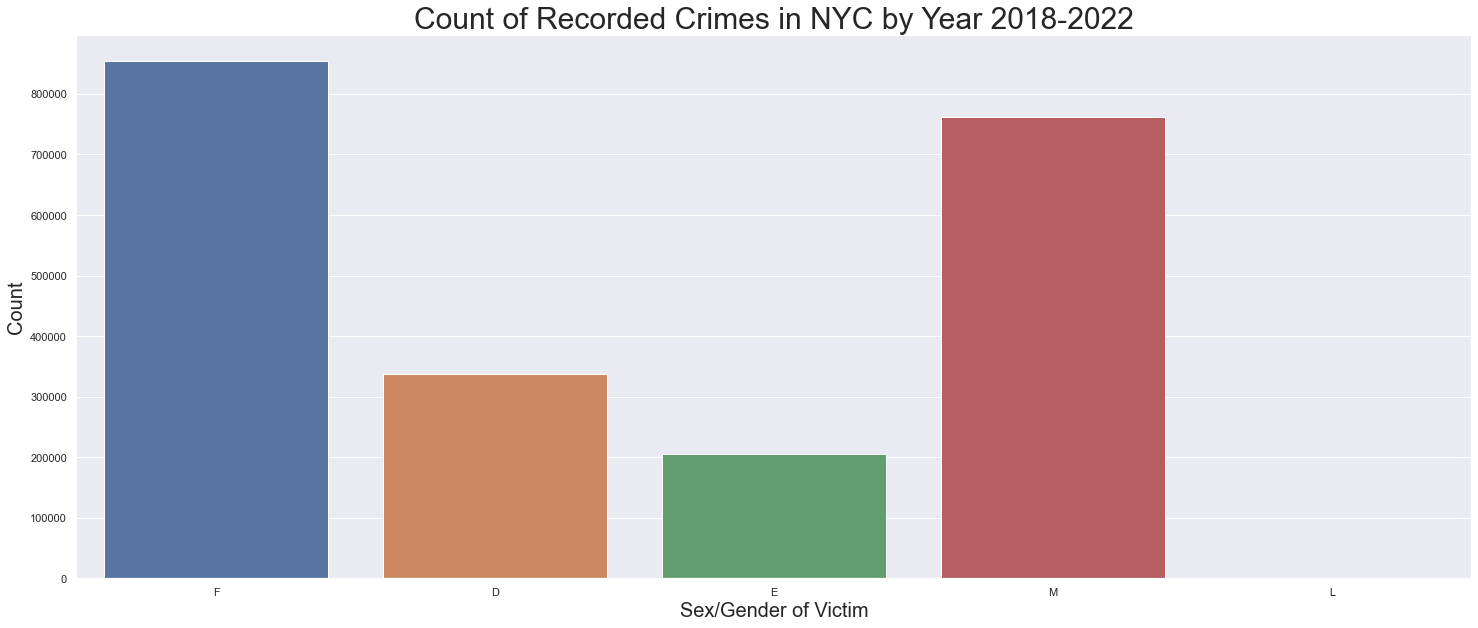

In [71]:
#count of Sex of Victim

plot_3 = sns.countplot(data = Union20192022, x = 'SexGender of Victim')
plt.xlabel('Sex/Gender of Victim',fontdict={'fontsize': 20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.title('Count of Recorded Crimes in NYC by Year 2018-2022',fontdict={'fontsize': 30})
# #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 200)
# plt.grid(True)
plt.show()

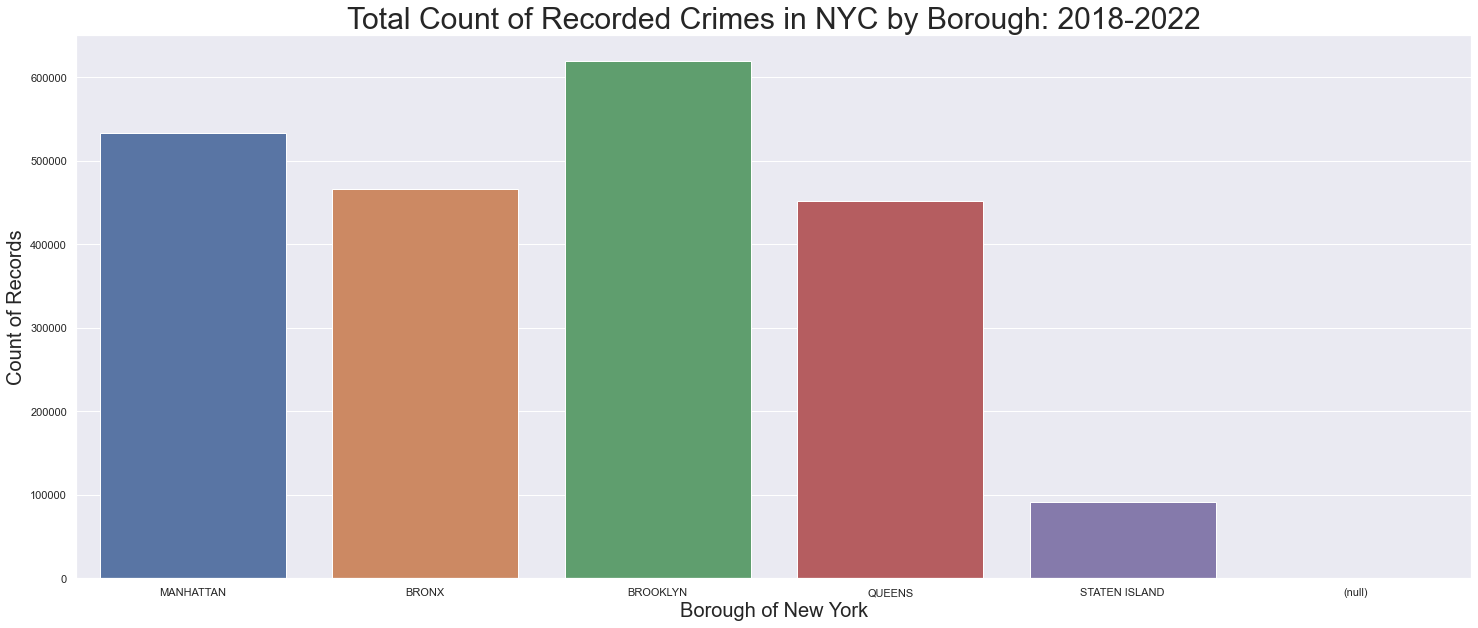

In [58]:
#count of Records by Borough

plot_4 = sns.countplot(data = Union20192022, x = 'Borough')
plt.xlabel('Borough of New York',fontdict={'fontsize': 20})
plt.ylabel('Count of Records',fontdict={'fontsize': 20})
plt.title('Total Count of Recorded Crimes in NYC by Borough: 2018-2022',fontdict={'fontsize': 30})
# #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 200)
# plt.grid(True)
plt.show()

time series?

from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()



plt.plot(Union20192022., Union20192022.classes)
plt.show()

time series -  box plot?

series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

In [59]:
# count = Union20192022['Borough'].count()
len(Union20192022)

2162457

In [60]:
CountByYear= Union20192022.groupby([Union20192022["Date of Crime"].dt.year])["Record ID Number"].count()
print(CountByYear) #where did all of these years come from!!!

Date of Crime
2000        55
2001        11
2002        58
2003         7
2004         9
2005        13
2006        14
2007        15
2008        15
2009        20
2010        27
2011        77
2012        68
2013        55
2014        68
2015        75
2016        87
2017       132
2018    460414
2019    456866
2020    411852
2021    445753
2022    386766
Name: Record ID Number, dtype: int64


In [61]:
Union20192022.columns

Index(['Record ID Number', 'Date of Crime', 'Precinct of Crime',
       'First Recorded', 'Description of Offense', 'Description of Offense(G)',
       'Level of Offense', 'Borough', 'Location of Crime', 'Latitude',
       'Longitude', 'Lat_Lon', 'Age of Victim', 'Race of Victim',
       'SexGender of Victim'],
      dtype='object')

In [62]:
#Analysis 
#Group By
#df.groupby("GroupCol")["AggCol"].agg()
#Show total sales by Region

# TotalSalesRegion = SSdf.groupby("Date of Crime")["Sales"].count()
# print(TotalSalesRegion)

This afternoon's plan:
pdsql filter by borough
by level of offense
by types of crime

#check out specifics -- race -  wave of asian crimes?; sex - trans/non-binary; 
#draft of the graphs and charts i want to make

In [72]:
#Selecting Data between 2018-2022

query2  = ('''
SELECT *
FROM Union20192022
WHERE "Date of Crime" BETWEEN '2018-01-01' AND '2022-12-31';
''')
df2 = mysql(query2)
df2.head(10)

#alters the data type of my columns.....no!!!

,Record ID Number,Date of Crime,Precinct of Crime,First Recorded,Description of Offense,Description of Offense(G),Level of Offense,Borough,Location of Crime,Latitude,Longitude,Lat_Lon,Age of Victim,Race of Victim,SexGender of Victim
0,506547392,2018-03-29 00:00:00.000000,32.0,03/30/2018,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,MANHATTAN,PARKING LOT/GARAGE (PUBLIC),40.810877,-73.941064,"(40.810877241, -73.941064151)",25-44,WHITE,F
1,629632833,2018-02-06 00:00:00.000000,52.0,02/07/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,BRONX,DEPARTMENT STORE,40.873671,-73.908014,"(40.873671035, -73.908013649)",UNKNOWN,UNKNOWN,D
2,787203902,2018-11-21 00:00:00.000000,75.0,11/21/2018,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BROOKLYN,STREET,40.651782,-73.885457,"(40.651782232, -73.885456761)",UNKNOWN,UNKNOWN,D
3,280364018,2018-06-09 00:00:00.000000,10.0,06/10/2018,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,40.759310,-73.994706,"(40.759310399, -73.994706072)",18-24,WHITE HISPANIC,F
4,985800320,2018-11-10 00:00:00.000000,19.0,11/10/2018,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,MANHATTAN,CHAIN STORE,40.764536,-73.970728,"(40.764535539, -73.970728388)",UNKNOWN,UNKNOWN,D
5,777641183,2018-03-12 00:00:00.000000,25.0,03/12/2018,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,TRANSIT - NYC SUBWAY,40.804384,-73.937422,"(40.804384046, -73.937421669)",UNKNOWN,UNKNOWN,E
6,683416529,2018-09-12 00:00:00.000000,46.0,09/12/2018,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",FELONY,BRONX,FAST FOOD,40.853653,-73.906892,"(40.853653041, -73.906891831)",UNKNOWN,UNKNOWN,D
7,570490441,2018-01-16 00:00:00.000000,69.0,01/16/2018,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BROOKLYN,STREET,40.635516,-73.913278,"(40.635516265, -73.913277993)",<18,BLACK,M
8,377132404,2018-08-04 00:00:00.000000,44.0,08/04/2018,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BRONX,RESIDENCE - APT. HOUSE,40.826170,-73.916831,"(40.826169612, -73.916830709)",25-44,WHITE HISPANIC,F
9,504303130,2018-09-26 00:00:00.000000,28.0,09/26/2018,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY,MANHATTAN,STREET,40.803905,-73.952037,"(40.803905237, -73.952036608)",25-44,BLACK,M


In [73]:
df2['Date of Crime'] = pd.to_datetime(df2['Date of Crime'],format='%Y-%m-%d')
#convert datetime back to datetime

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161602 entries, 0 to 2161601
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Record ID Number           object        
 1   Date of Crime              datetime64[ns]
 2   Precinct of Crime          float64       
 3   First Recorded             object        
 4   Description of Offense     object        
 5   Description of Offense(G)  object        
 6   Level of Offense           object        
 7   Borough                    object        
 8   Location of Crime          object        
 9   Latitude                   float64       
 10  Longitude                  float64       
 11  Lat_Lon                    object        
 12  Age of Victim              object        
 13  Race of Victim             object        
 14  SexGender of Victim        object        
dtypes: datetime64[ns](1), float64(3), object(11)
memory usage: 247.4+ MB


In [75]:
df2.isnull().sum() #i keep trying to drop the nulls and duplicates...they're not budging!!

Record ID Number             0
Date of Crime                0
Precinct of Crime            0
First Recorded               0
Description of Offense       0
Description of Offense(G)    0
Level of Offense             0
Borough                      0
Location of Crime            0
Latitude                     0
Longitude                    0
Lat_Lon                      0
Age of Victim                0
Race of Victim               0
SexGender of Victim          0
dtype: int64

In [76]:
#TOTAL COUNT OF CRIMES EACH YEAR

CountByYear2= df2.groupby([df2["Date of Crime"].dt.year])["Record ID Number"].count()
print(CountByYear2)

Date of Crime
2018    460414
2019    456866
2020    411852
2021    445752
2022    386718
Name: Record ID Number, dtype: int64


In [78]:
df2["Precinct of Crime"].unique()

df2["Precinct of Crime"]= df2["Precinct of Crime"].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161602 entries, 0 to 2161601
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Record ID Number           object        
 1   Date of Crime              datetime64[ns]
 2   Precinct of Crime          int64         
 3   First Recorded             object        
 4   Description of Offense     object        
 5   Description of Offense(G)  object        
 6   Level of Offense           object        
 7   Borough                    object        
 8   Location of Crime          object        
 9   Latitude                   float64       
 10  Longitude                  float64       
 11  Lat_Lon                    object        
 12  Age of Victim              object        
 13  Race of Victim             object        
 14  SexGender of Victim        object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(11)
memory usage: 247.4+ MB


In [83]:
df2.to_csv('/Users/charlenenthomas/OneDrive/Documents/Union20182022.csv')  